![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif) 

# Ex1 Implementing Linear Regression

In this first exercise we will be implementing a linear regression algorithm. For this exercise we have a set of ten points $(X_1,y_1) \cdots (X_{10},y_{10})$.  

In [1]:
# Importing the libraries and functions we will need for this exercise
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

<IPython.core.display.Javascript object>


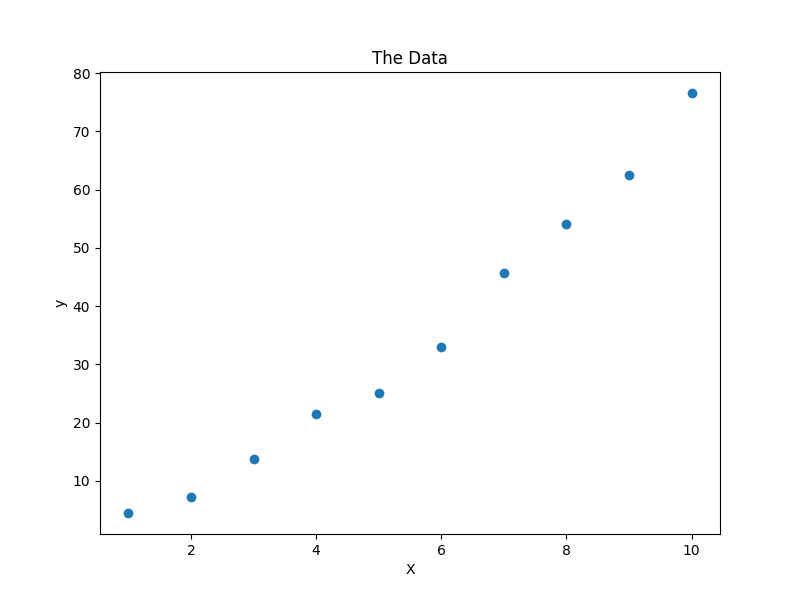

In [2]:
# The data
np.random.seed(42)
X = np.arange(1, 11).reshape(10, 1)
y = 0.5*X**2+ 2.5*X+0.5+2*np.random.randn(10,1)

ylim = [0,80]
%matplotlib notebook
fig_size = (8.,6.)
plt.figure(figsize=fig_size)
plt.scatter(X, y)
plt.title('The Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

**Reminder :** the goal in a regression task is to learn the mapping from the features (explanatory variables or input) to the response variable (or output). In our case we want to learn some function $f$ to make our predictions: 

$$y^{pred}:=f(X)$$ 

such that these predictions are close to the observed points $y$.

In linear regression we assume that the mapping between the features and the response variables is linear thus we can define our function $f$ as follows: 
$$f(X):=w_1 X + w_0$$
where $w_1$ and $w_0$ are two parameters.

The goal is then to optimize these parameters so that our predictions fit the data that we have. The standard approach to do so is to define a loss function that determines the quality of our model and to use an optimization algorithm to find the parameters that minimize this loss function. The standard loss for a regression task is the mean squared error (MSE):

$$\mathcal{L}_{MSE}(\boldsymbol{y},\boldsymbol{y}^{pred}):= \frac{1}{n}\sum_{i=1}^{n}(y_i^{pred}-y_i)^2$$

with $\boldsymbol{y},\boldsymbol{y}^{pred}$ being the vector of the true values and the vector of the predictions we have made. So the problem we want to solve is the following:

$$\hat{w} = \underset{w}{\operatorname{argmin}} \mathcal{L}_{MSE}(\boldsymbol{y},\boldsymbol{y}^{pred})$$

**Gradient descent:** As you have seen in the theoretical part this is a first-order iterative optimization algorithm for finding the minimum of a function. The way it works is that you iteratively update the variables on which you are optimizing. In our case we want to minimize the loss function $\mathcal{L}_{MSE}$ with respect to $w_0$ and $w_1$.

You start by initializing the variables so in our case:
$$w_1^{(0)} = 0 $$$$w_0^{(0)} = 0$$
And then the update step for going from one iteration to the next is :
$$w_1^{(j+1)} = w_1^{(j)}-L\frac{\partial \mathcal{L}_{MSE}(\boldsymbol{y},\boldsymbol{y}^{pred})}{\partial w_1}$$ $$w_0^{(j+1)} = w_0^{(j)}-L\frac{\partial \mathcal{L}_{MSE}(\boldsymbol{y},\boldsymbol{y}^{pred})}{\partial w_0}$$
with $L$ being the learning rate.

**Task 1:** To solve this optimization problem we will implement a gradient descent algorithm. Fill in the missing steps in the code.

**Hint:** For the derivative just make sure you replace $y_i^{pred}$ by its definition in the loss function. 

**Note:** This is not **stochastic** gradient descent, there is no need for additional loops in the following code.

<IPython.core.display.Javascript object>


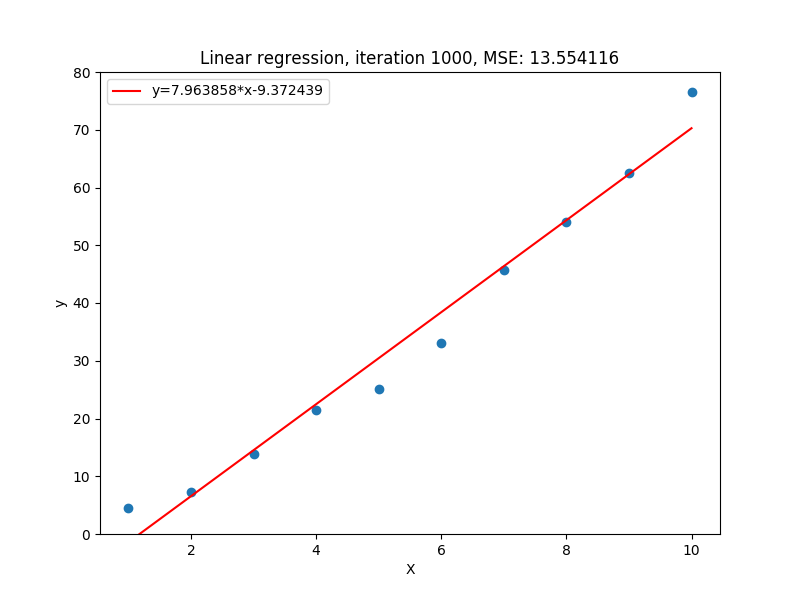

In [3]:
# Preparing visualization of the results
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1,1,1)
ax.set_ylim(ylim)
plt.ion()
plt.show()
fig.canvas.draw()

# Initializing the model parameters.
w1 = 0.
w0 = 0.

L = 0.01  # The learning Rate
num_iter = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Main loop for the gradient descent algorithm
for i in range(num_iter): 
    y_pred = w1*X + w0  # The current predicted value of Y
    
    D_w1 = (2/n) * np.sum(X * (y_pred-y))  # Derivative of the loss wrt w1
    D_w0 = (2/n) * np.sum(y_pred-y)  # Derivative of the loss wrt w0
    w1 = w1 - L * D_w1  # Update of w1
    w0 = w0 - L * D_w0  # Update of w0
    
    # Visualizing the results
    if (i+1) % 10 == 0:
        ax.clear()
        plt.xlabel('X')
        plt.ylabel('y')
        ax.scatter(X, y) 
        ax.set_ylim(ylim)
        if w0 <0:
            lab = 'y={:4f}*x{:4f}'.format(w1,w0)
        else:
            lab = 'y={:4f}*x+{:4f}'.format(w1,w0)
        ax.plot([np.min(X), np.max(X)], [np.min(y_pred), np.max(y_pred)], color='red',label=lab)  # regression line
        ax.set_title('Linear regression, iteration {}, MSE: {:4f}'.format(i+1,mean_squared_error(y,y_pred)))
        ax.legend(loc=2)
        fig.canvas.draw()

For the rest of the exercise we will [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)'s linear regression model, so you can carry on even if you have not finished the previous part.

<IPython.core.display.Javascript object>


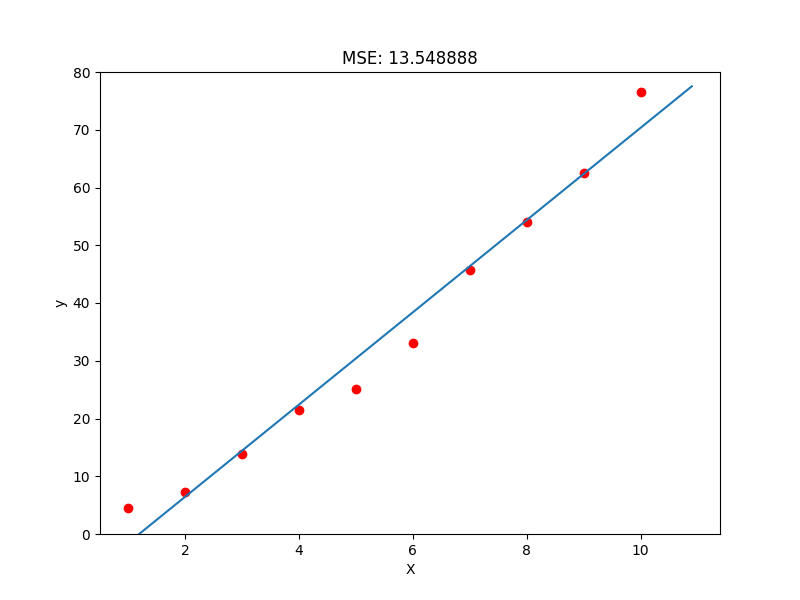

In [4]:
# Using sklearn's linear regression model.
model = LinearRegression()
model.fit(X, y)
x = np.arange(1, 11, 0.1).reshape(-1, 1)
pred = model.predict(x)
plt.figure(figsize=fig_size)
plt.plot(X, y, 'ro', x, pred)
axes = plt.gca()
axes.set_ylim(ylim)
axes.set_title("MSE: {:4f}".format(mean_squared_error(y,model.predict(X))))
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Now let's try to improve the accuracy of our model.

The most basic way to do so is often just to add additional features (explanatory variables). Let's try for example to add the squares of the features. This means we are making the assumption that the mapping between the data $X$ and the  response variables $y$ is polynomial of degree $2$, thus we are now fitting a function $f_2$ defined as follows: 
$$f_2(X):=w_2 {X}^2+w_1 X + w_0$$

**Task 2:** Create a $10\times2$ matrix X2 where the first column is the original $X$ data and the second column is $X^2$.  

In [5]:
X2 = X
X2 = np.c_[X,X**2]

<IPython.core.display.Javascript object>


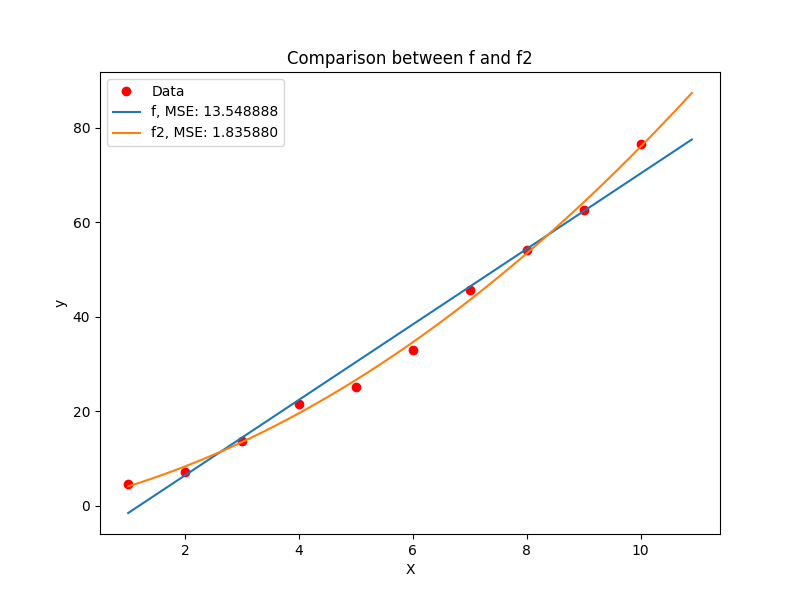

In [6]:
model.fit(X, y)
plt.figure(figsize=fig_size)
plt.plot(X, y, 'ro',label='Data')
plt.plot(x, pred,label='f, MSE: {:4f}'.format(mean_squared_error(y,model.predict(X))))
model.fit(X2, y)
x2 = np.arange(1, 11, 0.1)
x2 = np.c_[x2, x2**2]
pred2 = model.predict(x2)
plt.plot(x2[:, 0], pred2,label='f2, MSE: {:4f}'.format(mean_squared_error(y,model.predict(X2))))
plt.legend()
plt.title("Comparison between f and f2")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Let's see what happens if you take this reasoning even further. 

**Task 3:** In the following code try to increase $N$ the degree of the features that you are adding and find out how much you can improve the the fit of the model. What do you notice?

<IPython.core.display.Javascript object>


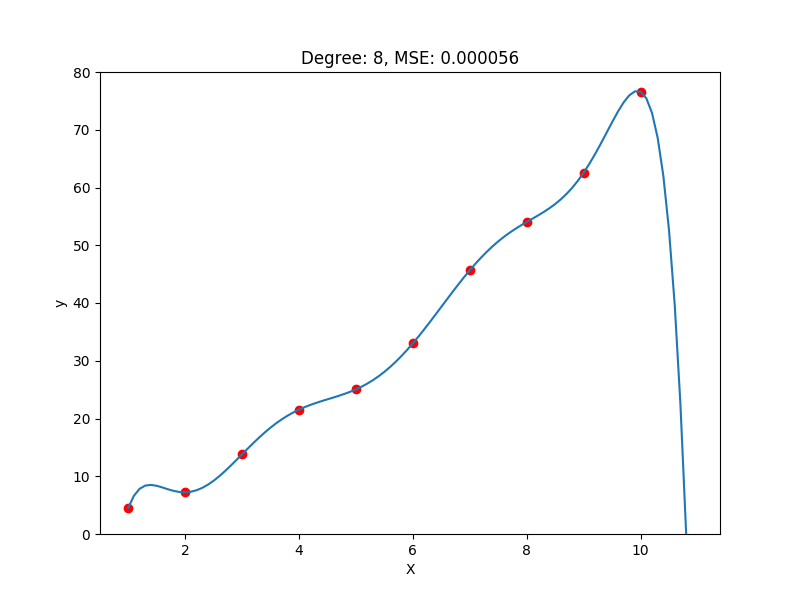

In [7]:
N = 8
XN = X
xN = np.arange(1, 11, 0.1)
for i in range(1,N):
    XN = np.c_[XN,X**(i+1)]
    xN = np.c_[xN,np.arange(1, 11, 0.1)**(i+1)]
model.fit(XN, y)
predN = model.predict(xN)
plt.figure(figsize=fig_size)
plt.plot(XN[:, 0], y, 'ro', xN[:, 0], predN)
plt.title("Degree: {}, MSE: {:4f}".format(N,mean_squared_error(y,model.predict(XN))))
plt.ylim(ylim)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Let's say that we chose $N=8$ as the MSE is pretty low. Suppose that we are sampling some new points from the same original distribution how well does our model fits to the new data?

<IPython.core.display.Javascript object>


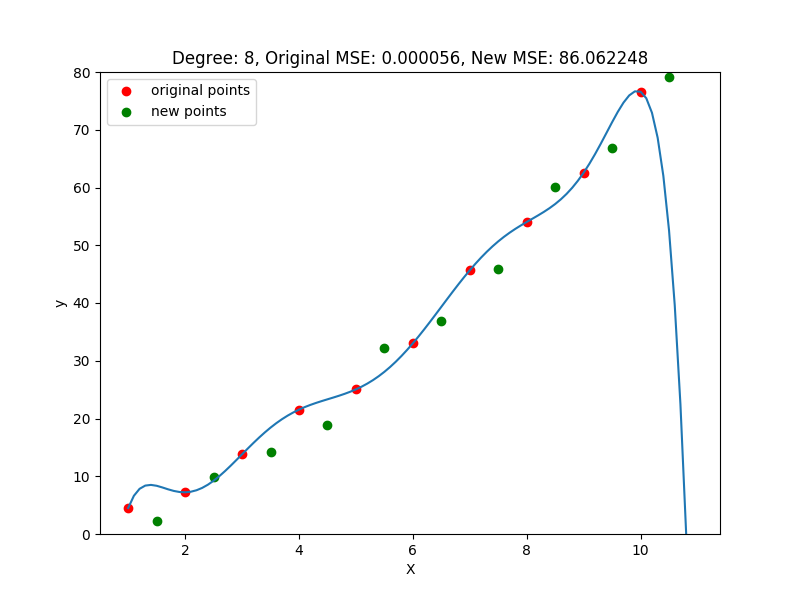

In [8]:
N = 8
np.random.seed(50)
X_val = X + 0.5
XN_val = X_val
for i in range(1,N):
    XN_val = np.c_[XN_val,X_val**(i+1)]
y_val =0.5*X_val**2+ 2.5*X_val+0.5+2*np.random.randn(10,1)
plt.figure(figsize=fig_size)
plt.plot(X, y, 'ro',label='original points')
plt.plot(XN_val[:,0],y_val,'go',label='new points')
plt.legend()
plt.title("Degree: {}, Original MSE: {:4f}, New MSE: {:4f}".format(N,mean_squared_error(y,model.predict(XN)),mean_squared_error(y_val,model.predict(XN_val))))
plt.plot(xN[:, 0], predN)
plt.ylim(ylim)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

This is one of the most important messages of this exercise. If you make the model complicated enough it will be able to fit your data perfectly but you have to make sure that you are using a validation scheme for your model! Splitting the data into training, validation and test sets or cross-validation are both valid schemes to evaluate how well your model generalizes to unseen data.

Let's make sure we are not overfitting to our training data, to do so we will use our new set of points as the validation set. For the purpose of this exercise we will not be using a test set.

**Reminder:** The training and validation sets are used during training, the test set is used only after you're done with training to evaluate your model on unseen data. The training set is used for fitting the parameters. Whereas the validation set is used to tune "hyperparameters" such as the complexity of the model we are choosing ($N$ in our case).

One way of preveting overfitting in our model is to choose the model complexity appropriately for the type of data that we have.

**Task 4:** Run the following code and decide on what you think is the optimal choice for $N$.

<IPython.core.display.Javascript object>


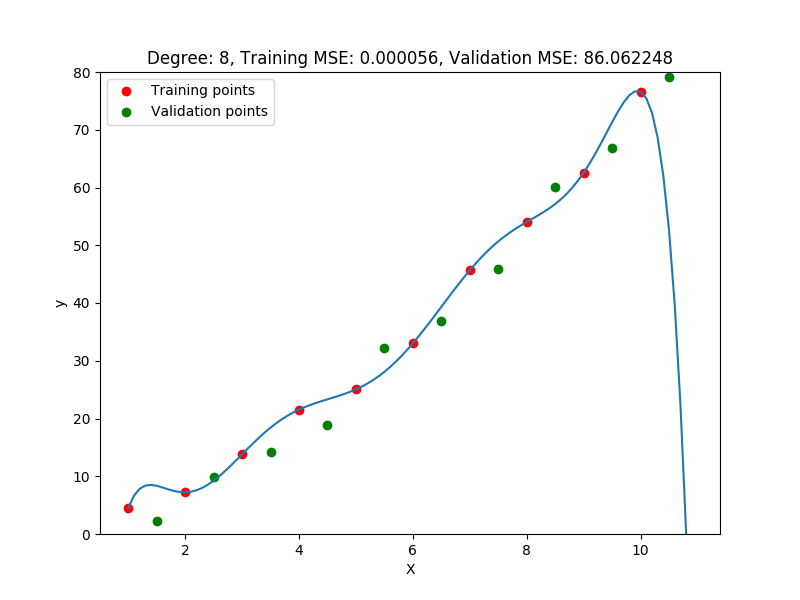

<IPython.core.display.Javascript object>


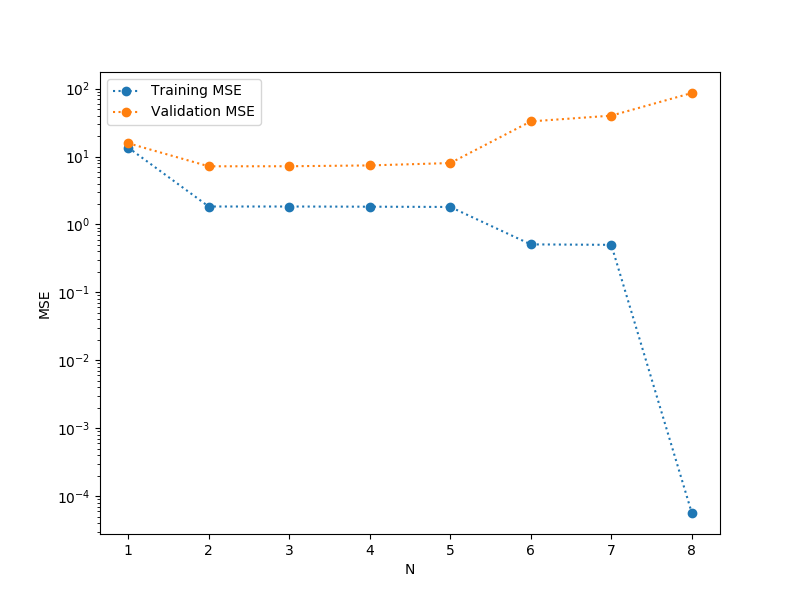

In [9]:
Ns = range(1,9)
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1,1,1)
plt.ion()
plt.show()
fig.canvas.draw()
train_mses=[]
val_mses=[]
for N in Ns:
    ax.clear()
    X_val = X + 0.5
    XN_val = X_val
    XN = X
    xN = np.arange(1, 11, 0.1).reshape(100,1)
    for i in range(1,N):
        XN = np.c_[XN,X**(i+1)]
        xN = np.c_[xN,np.arange(1, 11, 0.1)**(i+1)]
        XN_val = np.c_[XN_val,X_val**(i+1)]
        
    model.fit(XN, y)
    predN = model.predict(xN)
    ax.plot(X, y, 'ro',label='Training points')
    ax.plot(XN_val[:,0],y_val,'go',label='Validation points')
    plt.legend()
    plt.title("Degree: {}, Training MSE: {:4f}, Validation MSE: {:4f}".format(N,mean_squared_error(y,model.predict(XN)),mean_squared_error(y_val,model.predict(XN_val))))
    train_mses.append(mean_squared_error(y,model.predict(XN)))
    val_mses.append(mean_squared_error(y_val,model.predict(XN_val)))
    ax.plot(xN[:, 0], predN)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.pause(0.5)
    fig.canvas.draw()
plt.figure(figsize=fig_size)
plt.semilogy(Ns,train_mses,'o:',label='Training MSE')
plt.semilogy(Ns,val_mses,'o:',label='Validation MSE')
plt.xlabel('N')
plt.ylabel('MSE')
plt.legend()
plt.show()

One other way of preveting overfitting in our model is to introduce a regularizer. This means introducing an additional term to the loss function that penalizes large weights. For the purpose of this example we will use ridge regression where the optimization problem is the following:

$$\hat{w} = \underset{w}{\operatorname{argmin}} \frac{1}{n}\sum_{i=1}^n(y_i^{pred}-y_i)^2+\alpha\sum_jw_j^2$$

**Task 5:** Run the following code and decide on what you think is the optimal choice for $\alpha$.

<IPython.core.display.Javascript object>


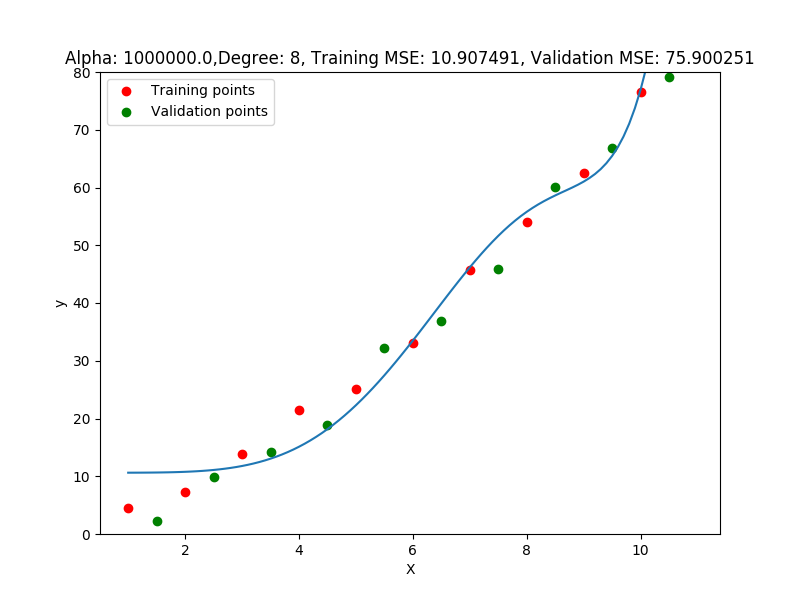

<IPython.core.display.Javascript object>


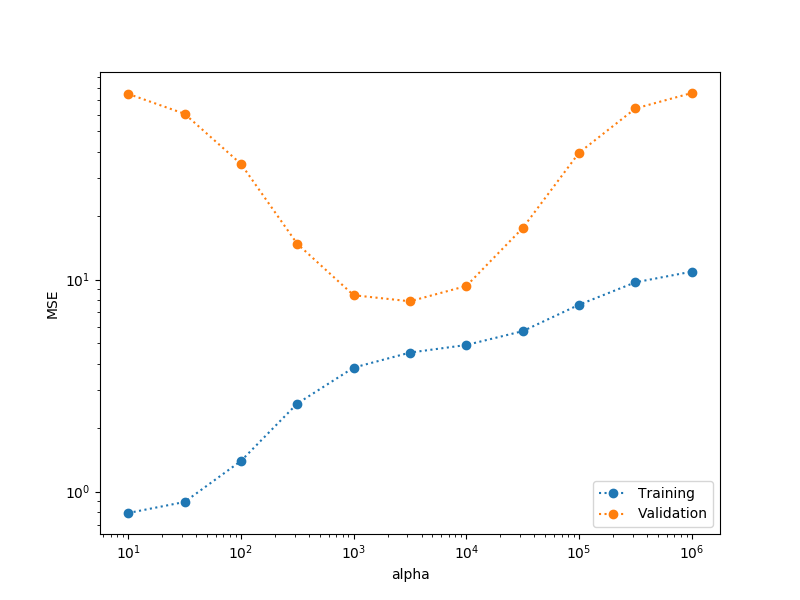

In [10]:
alphas =np.logspace(1,6,11)
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1,1,1)
plt.ion()
plt.show()
fig.canvas.draw()
train_mses=[]
val_mses=[]
for alpha in alphas:
    model_ridge = Ridge(alpha)
    ax.clear()
    model_ridge.fit(XN, y)
    predN = model_ridge.predict(xN)
    ax.plot(X, y, 'ro',label='Training points')
    ax.plot(XN_val[:,0],y_val,'go',label='Validation points')
    plt.legend()
    plt.title("Alpha: {},Degree: {}, Training MSE: {:4f}, Validation MSE: {:4f}".format(alpha,N,mean_squared_error(y,model_ridge.predict(XN)),mean_squared_error(y_val,model_ridge.predict(XN_val))))
    train_mses.append(mean_squared_error(y,model_ridge.predict(XN)))
    val_mses.append(mean_squared_error(y_val,model_ridge.predict(XN_val)))
    ax.plot(xN[:, 0], predN)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.pause(0.5)
    fig.canvas.draw()
plt.figure(figsize=fig_size)
plt.loglog(alphas,train_mses,'o:',label='Training')
plt.loglog(alphas,val_mses,'o:',label='Validation')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

# Ex2 Implementing Logistic Regression
In this first exercise we will be implementing a logistic regression algorithm. Be careful this is actually a **classification** algorithm.  

We are solving a binary classification task, this means that every point belongs to one of two classes either $1$ or $0$. 

In [11]:
####################################################################
# Make sure you run this cell but there is no need to read the code
####################################################################

def gen_data(typ="gauss",noise =0.4,seed=42):
    noise=0.4
    np.random.seed(seed)
    n_samples = 100
    data = np.ones((n_samples,3))
    if typ == "gauss":
        for i in range(n_samples):
            if i < n_samples/2:
                data[i,0] = np.random.randn() - 2
                data[i,1] = np.random.randn() - 2
                data[i,2] = 1
            else:
                data[i,0] = np.random.randn() + 2
                data[i,1] = np.random.randn() + 2
                data[i,2] = 0
    elif typ == "circle":
        radius = 5.
        for i in range(n_samples):
            if i < n_samples/2:
                r = radius*0.5*np.random.rand()
                angle = 2.*np.pi*np.random.rand()
                data[i,0] = r*np.sin(angle)+(np.random.rand()*2.*radius-radius)*noise
                data[i,1] = r*np.cos(angle)+(np.random.rand()*2.*radius-radius)*noise
                data[i,2] = 1
            else:
                r = radius*0.7+radius*0.3*np.random.rand()
                angle = 2.*np.pi*np.random.rand()
                data[i,0] = r*np.sin(angle)
                data[i,1] = r*np.cos(angle)
                data[i,2] = 0
    elif typ == "xor":
        for i in range(n_samples):
            data[i,0] = (np.random.rand()*10.-5)*noise
            data[i,1] = (np.random.rand()*10.-5)*noise
            data[i,2] = 1
        data[np.where(data[:,0]*data[:,1]<0),2] =0 
    elif typ == "spiral":
        n = int(n_samples/2)
        for i in range(n):
            r = i/n *5
            t = 1.75 *i/n*2*np.pi
            data[i,0] = r*np.sin(t) + (np.random.rand()*2 - 1)*noise
            data[i,1] = r*np.cos(t) + (np.random.rand()*2 - 1)*noise
            data[i,2] = 1

        for i in range(n):
            r = i/n *5
            t = 1.75 *i/n*2*np.pi + np.pi
            data[n+i,0] = r*np.sin(t) + (np.random.rand()*2 - 1)*noise
            data[n+i,1] = r*np.cos(t) + (np.random.rand()*2 - 1)*noise
            data[n+i,2] = 0

    np.random.shuffle(data)
    return data[:,0:2],data[:,2]

def new_fig_lr(X,y,data,model,transform):
    if transform is None:
        def transform(X):
            return X
    preds = model.predict(data)
        
    plt.figure(figsize=fig_size)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
    plt.legend()
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = transform(np.c_[xx1.ravel(), xx2.ravel()])
    probs = model.predict_prob(grid).reshape(xx1.shape)
    plt.contourf(xx1, xx2, probs, [0,0.5,1.], alpha=0.2,colors=['C1','b']);
    CS = plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
    labels = ['Decision boundary']
    for i in range(len(labels)):
        CS.collections[i].set_label(labels[i])
    plt.title("Training accuracy: {:4f}".format((preds == y).mean()))
    plt.legend()
    plt.show()

def new_fig_data_lr(X,y):
    plt.figure(figsize=fig_size)
    plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1],label="Class 1")
    plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="Class 0")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

Let's start with a simple dataset. Just be careful in this case $X$ is a $N\times 2$ matrix containing the coordinates of the points and $y$ is a $N$ dimensional vector with the corresponding labels. 

<IPython.core.display.Javascript object>


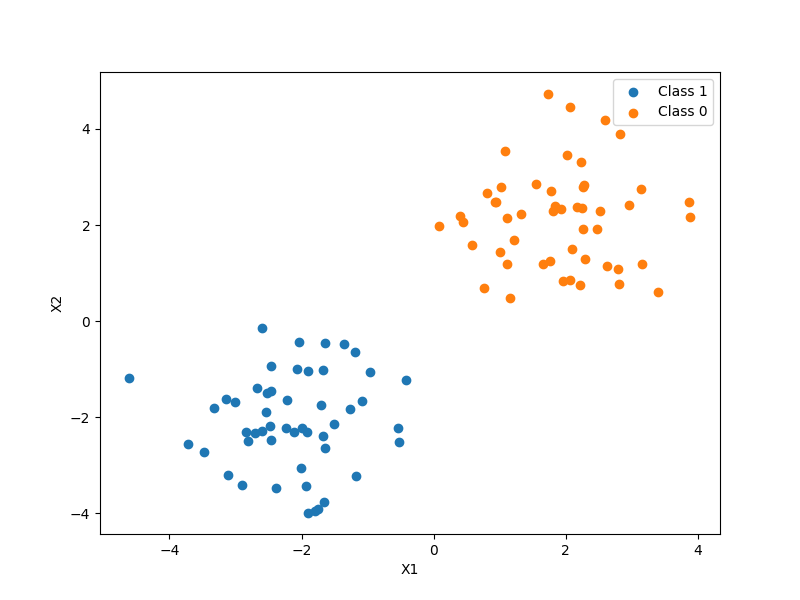

In [12]:
X,y = gen_data()
new_fig_data_lr(X,y)

**Reminder :** Similarly to the linear regression case we want to learn some function $f$ to make our predictions: 

$$y^{pred}:=f(X)$$ 

such that these predictions are close to the observed labels $y$.

Again very much like logistic regression we define a combination of the input features:
$$z(X):=w_1 X_1 + w_2 X_2+ b$$

What's different is that now the variable that we want to approach is binary, it either correponds to Class 1 or to Class 0.

Logistic regression models the probability of a point belonging to the default class. So to obtain a probability from $h(x)$ we just feed it through a function that project $h(x)$ back to the range $0$ to $1$.

This is the **sigmoid** function (or logistic function), this function is very important in ML so make sure you remember its definition:

$$\sigma(x):=\frac{1}{1+\exp(-x)}$$

<IPython.core.display.Javascript object>


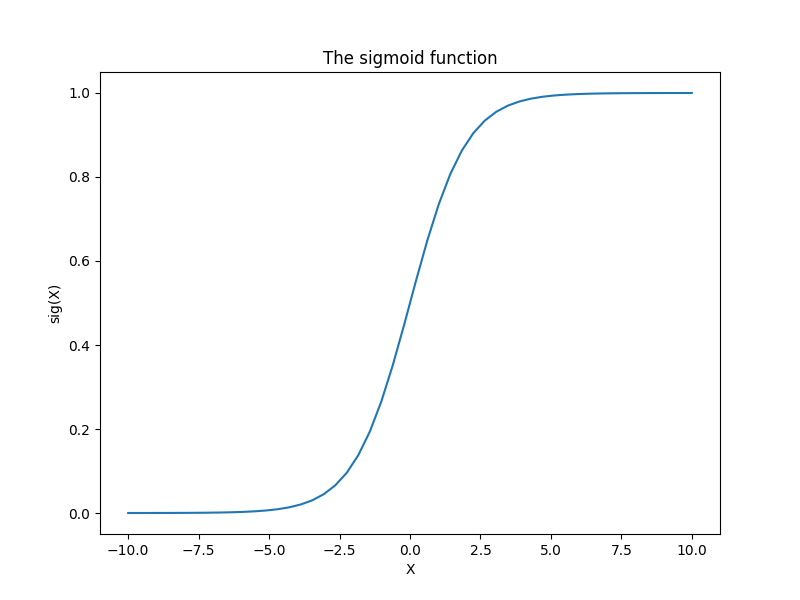

In [13]:
X_sig = np.linspace(-10,10)
y_sig = 1/(1+np.exp(-X_sig))
plt.figure(figsize=fig_size)
plt.plot(X_sig,y_sig)
plt.xlabel("X")
plt.ylabel("sig(X)")
plt.title('The sigmoid function')
plt.show()

So the definition of the predicted probability of the point belonging to the default class is: 

$$h(X_i):=\sigma(X_i\cdot w+ b)$$

with $w$ a vector of parameters (weights) and $b$ the intercept. Based on this predicted probability our predicted labels $y^{pred}$ are simply $y^{pred}=1$ if $h(X)>0.5$ and $y^{pred}=0$ otherwise. 

The goal is then exactly like for the linear regression case, we want to optimize these parameters so that our predictions fit the data that we have. The standard approach to do so is to define a loss function that determines the quality of our model and to use an optimization algorithm to find the parameters that minimize this loss function. The standard loss for a binary classification task is the cross-entropy loss (log loss)

$$\mathcal{L}_{CE}(X,y) := \frac{1}{n}\sum_{i=1}^{n}\left[-y_i\log(h(X_i))-(1-y_i)\log(1-h(X_i))\right]$$

so the problem we are trying to solve is the following:

$$\hat{w} = \underset{w}{\operatorname{argmin}}\mathcal{L}_{CE}(X,y) $$

Try to look at what happens when $y_i=1$ and similary when $y_i=0$.

This can be reformulated in vector form as follows: 

$$\{\hat{w},\hat{b}\} = \underset{w,b}{\operatorname{argmin}} \frac{1}{n}-y^\top\log(h(X))-(1-y^\top)\log(1-h(X))$$

whith $h(X)=\sigma(X\cdot w + b \boldsymbol{1_n})$ where $\boldsymbol{1_n}$ is a n-dimensional vector of ones.

**Task 1:** Fill in the missing code in the following definition of the Logistic Regression class, then run the cell to check the results. The gradient of the loss wrt. $w$ is:

$$\nabla_w \mathcal{L}_{CE}(X,y) = \frac{1}{n}X^\top\cdot(h(X)-y)$$

which is a 2 dimensional vector. The derivative of the loss wrt. $b$ is :

$$\frac{\partial\mathcal{L}_{CE}(X,y)}{\partial b}=\frac{1}{n}\boldsymbol{1_n}^\top\cdot(h(X)-y)=\frac{1}{n}\sum(h(X)-y)$$

If you have time try to compute this gradient and derivative yourself, note that: $\frac{d\sigma(x)}{dx}=\sigma(x)(1-\sigma(x))$.

<IPython.core.display.Javascript object>


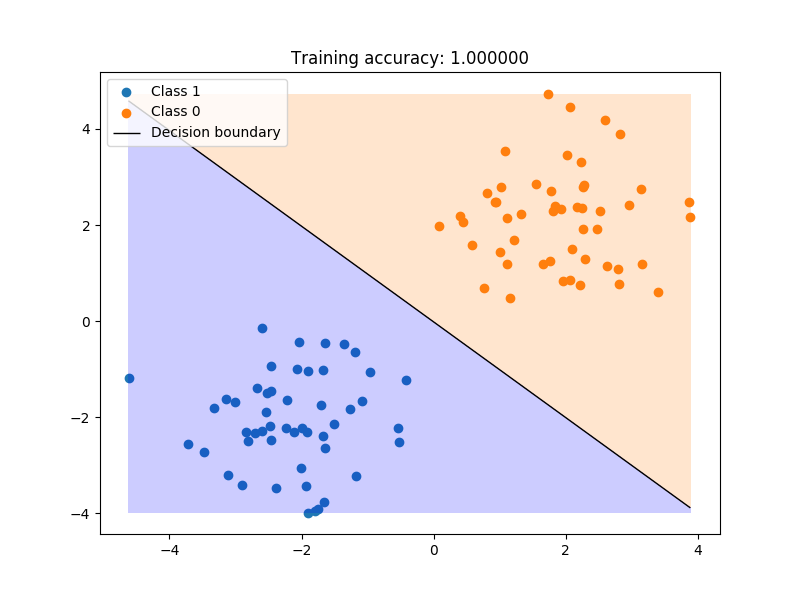

In [14]:
class LogisticRegression:
    def __init__(self, L=0.01, num_iter=1000):
        self.L = L
        self.num_iter = num_iter
           
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        
        # Weights initialization
        self.w = np.zeros(X.shape[1])
        self.b = 0.
        
        # Main gradient descent loop
        for i in range(self.num_iter):
            z = np.dot(X, self.w) + self.b
            h = self.sigmoid(z)
            gradient_w = np.dot(X.T, (h - y)) / y.size
            derivative_b = np.sum(h - y) / y.size
            self.w = self.w - self.L * gradient_w
            self.b = self.b - self.L * derivative_b
    
    def predict_prob(self, X):
        return (self.sigmoid(np.dot(X, self.w)+self.b))
    
    def predict(self, X):
        return self.predict_prob(X).round()
    
model = LogisticRegression(L=0.01, num_iter=1000)
model.fit(X, y)

new_fig_lr(X,y,X,model,None)

Let's now look at this new dataset.

<IPython.core.display.Javascript object>


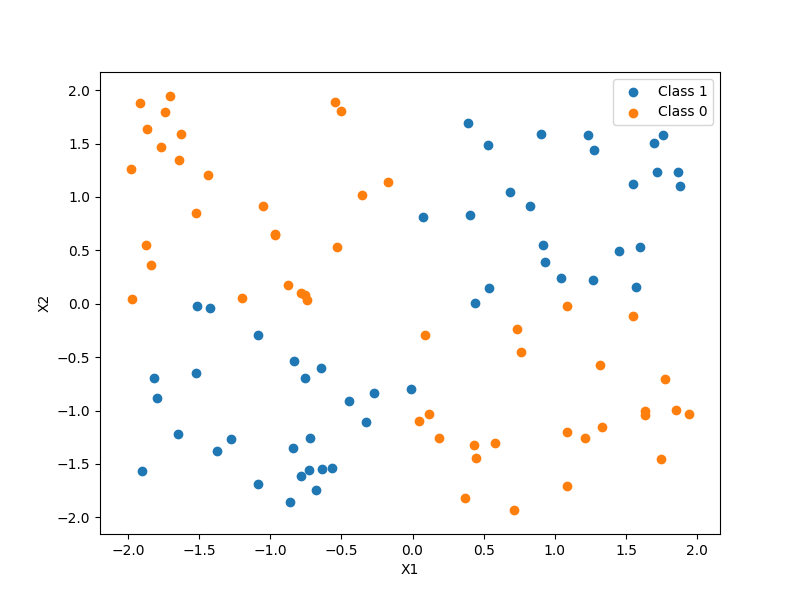

In [15]:
X,y = gen_data("xor")
new_fig_data_lr(X,y)

Let's try to fit our logistic regression model to this dataset.

<IPython.core.display.Javascript object>


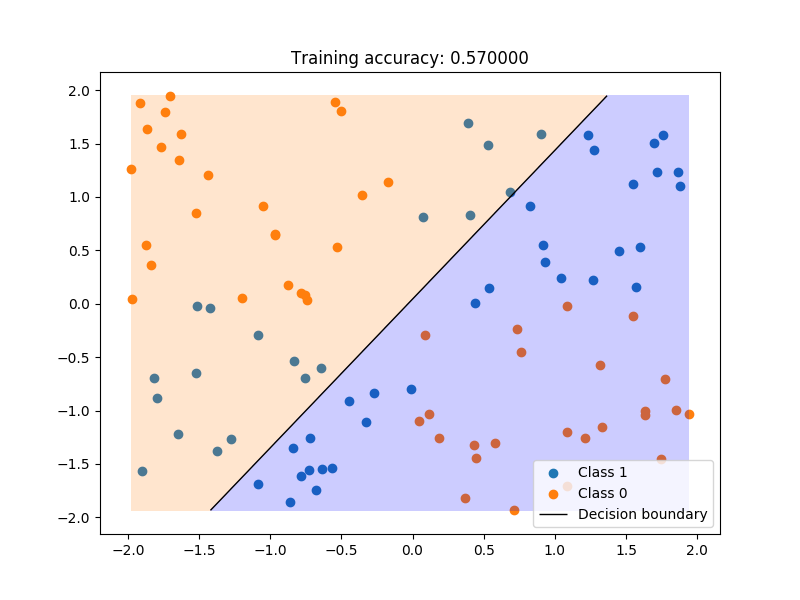

In [16]:
model = LogisticRegression(L=0.01, num_iter=1000)
model.fit(X, y)

new_fig_lr(X,y,X,model,None)

As you can clearly see the two classes are not linearly seperable. 

**Task 2:** Try to come up with a way to transform the data so that it becomes linearly separable. Make sure that your new transformed data is a $N\times C$ matrix, where $N$ is the number of datapoints and $C$ the number of features (ie:2 for the original data).

**Hint:** Try squaring the coordinates, using trigonometric functions, combining the two coordinates into a new one by adding or multiplying them. 

<IPython.core.display.Javascript object>


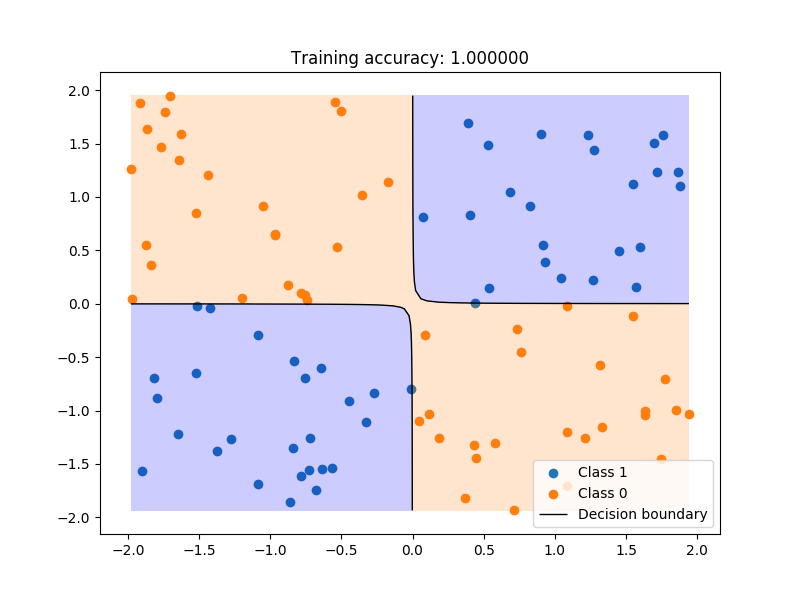

In [17]:
model = LogisticRegression(L=0.01, num_iter=1000)

def transform(X):
    return (X[:,0]*X[:,1]).reshape((X[:,0].size,1))

data = transform(X)
model.fit(data, y)

new_fig_lr(X,y,data,model,transform)

**Bonus Task:** If you have time, you can play around with two other datasets. Just change the argument in the `gen_data` function to "spiral" or "circular".

<IPython.core.display.Javascript object>


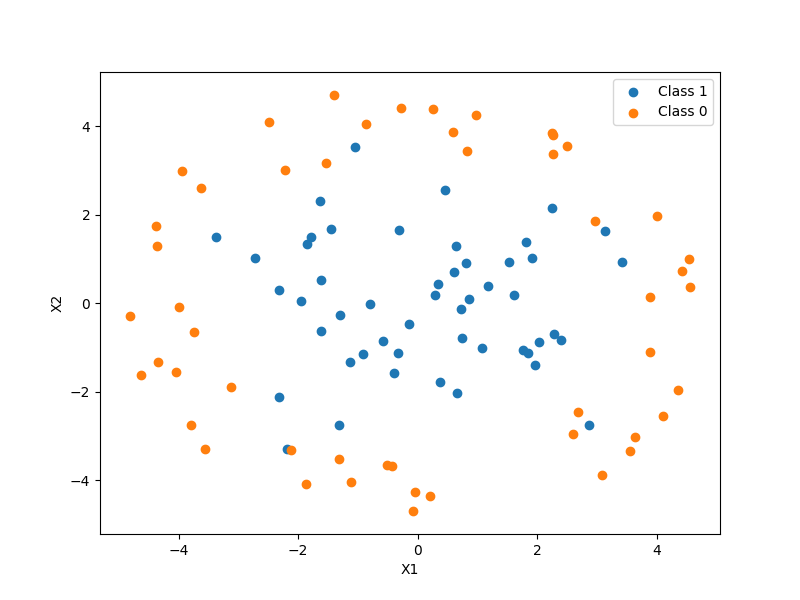

In [18]:
X, y = gen_data("circle")
new_fig_data_lr(X,y)

<IPython.core.display.Javascript object>


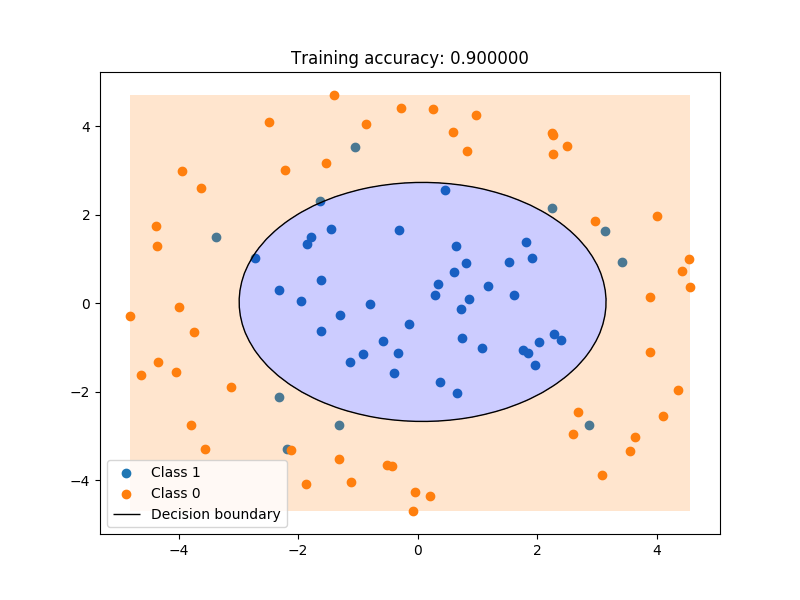

In [19]:
model = LogisticRegression(L=0.01, num_iter=1000)

def transform(X):
    return np.c_[X,X**2]

data = transform(X)
model.fit(data, y)

new_fig_lr(X,y,data,model,transform)

<IPython.core.display.Javascript object>


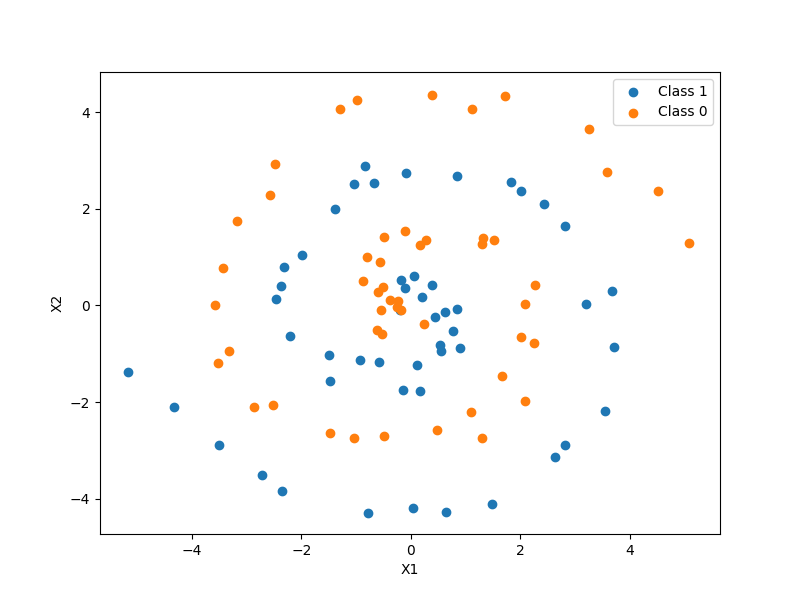

In [20]:
X,y = gen_data("spiral")
new_fig_data_lr(X,y)

<IPython.core.display.Javascript object>


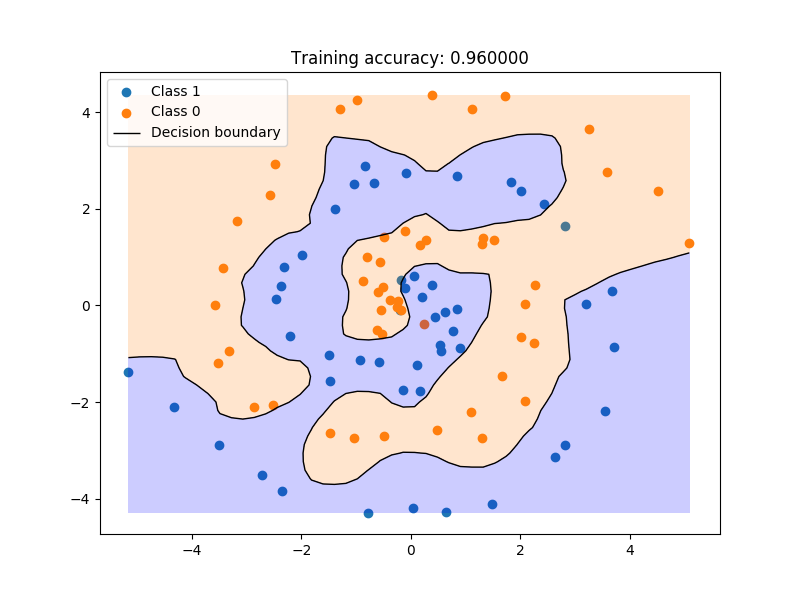

In [21]:
model = LogisticRegression(L=0.01, num_iter=10000)

def transform(X):
    np.random.seed(42)
    new_feature_ratio = 300
    K = np.random.randn(X.shape[1], X.shape[1]*new_feature_ratio)
    b = np.random.randn(X.shape[1]*new_feature_ratio)
    return np.maximum((np.matmul(X,K) + b),0) # This is basically a neural network with a random first layer

data = transform(X)
model.fit(data, y)

new_fig_lr(X,y,data,model,transform)